In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, roc_curve,roc_auc_score,accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


df = pd.read_csv( 'AI Module Dataset (Final).csv') 
display(df.head()) 

print ("Shape of the Dataframe: ", df.shape) 
print ("Columns in the Dataframe: ", df.columns) 

print ("Statistical Summary",df.describe())

# Count missing values
print("\nMissing Values")
print(df.isnull().sum()) 

# Add missing value in "EDUC" and "NIS" with mean value
Imputer = SimpleImputer(strategy='mean')
df['EDUC'] = Imputer.fit_transform(df[['EDUC']])
df['NIS'] = Imputer.fit_transform(df[['NIS']])



# Adding missing value in M/F category with the most frequent data
Category_Cols_Imputer = SimpleImputer(strategy='most_frequent')
df[['M/F']] = Category_Cols_Imputer.fit_transform(df[['M/F']])

# Checking missing value after preprocessing data
print("\nAfter Handling Missing Values")
print(df.isnull().sum()) 

# check for duplicate rows and count them
print("\nDulplicates Rows:")
print(df.duplicated().sum()) 



,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,NIS,MMSE,CDR,eTIV,nWBV,ASF
0,Subject_0001,Nondemented,1,0,M,87,14.0,2.0,27,0.0,1987,0.696,0.883
1,Subject_0001,Nondemented,2,457,M,88,NaN,2.0,30,0.0,2004,0.681,0.876
2,Subject_0002,Demented,1,0,M,75,12.0,NaN,23,0.5,1678,0.736,1.046
3,Subject_0002,Demented,2,560,NaN,76,12.0,3.0,28,0.5,1738,0.713,1.010
4,Subject_0002,Demented,3,1895,M,80,NaN,NaN,22,0.5,1698,0.701,1.034


Shape of the Dataframe:  (2461, 13)
Columns in the Dataframe:  Index(['MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Age', 'EDUC', 'NIS',
       'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')
Statistical Summary              Visit     MR Delay          Age         EDUC          NIS  \
count  2461.000000  2461.000000  2461.000000  2351.000000  2417.000000   
mean      1.784640   651.345794    78.309224    14.706933     2.482830   
std       0.896211   806.939448    10.009054     4.818099     1.099657   
min       1.000000     0.000000    60.000000     6.000000     1.000000   
25%       1.000000     0.000000    70.000000    11.000000     2.000000   
50%       2.000000   357.000000    78.000000    15.000000     2.000000   
75%       2.000000  1152.000000    87.000000    19.000000     3.000000   
max       5.000000  4722.000000    97.000000    23.000000     5.000000   

              MMSE          CDR         eTIV         nWBV          ASF  
count  2461.000000  2461.000000  

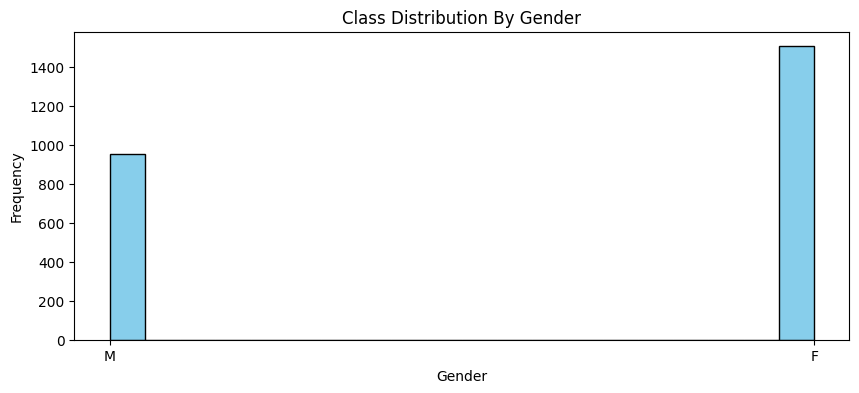

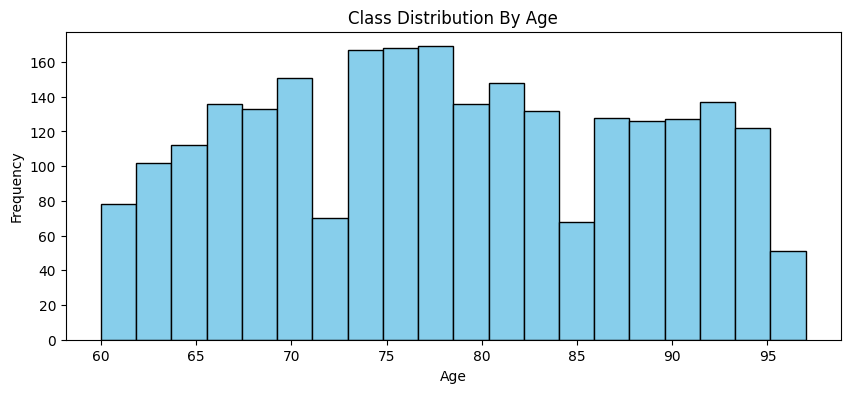

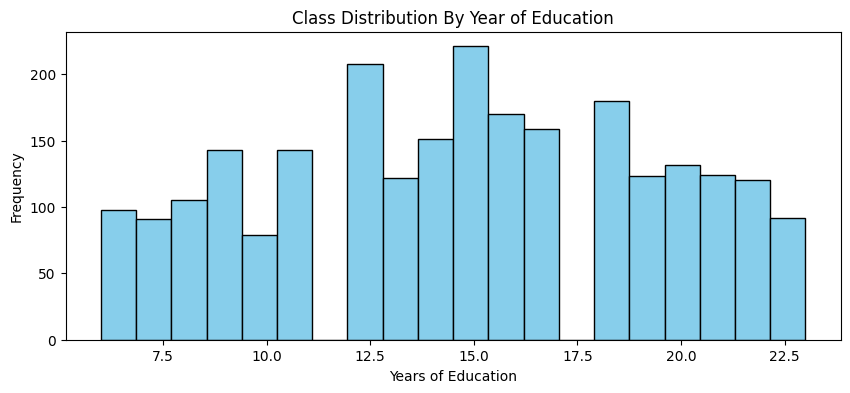

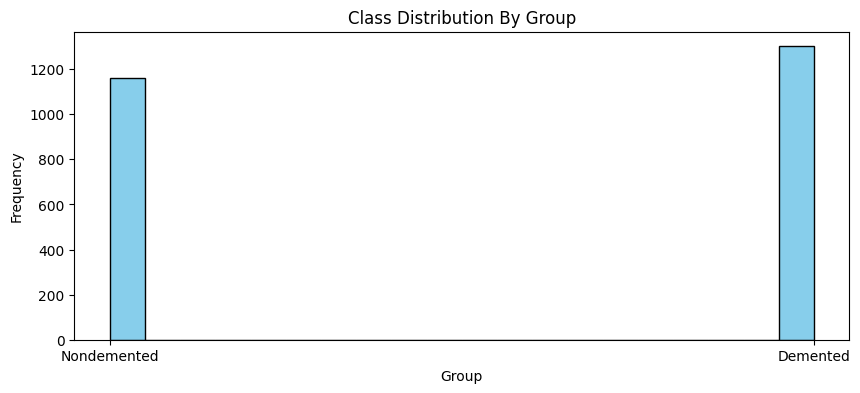

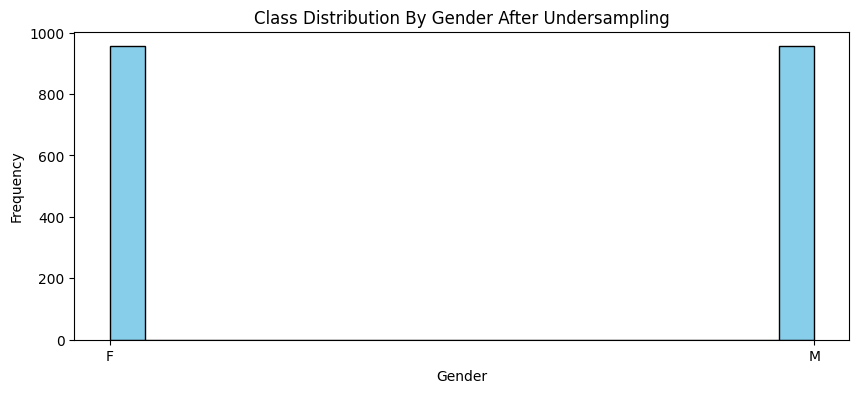

,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,NIS,MMSE,CDR,eTIV,nWBV,ASF,GROUP
927,Subject_0461,Demented,1,0,F,61,12.0,4.0,20,1.0,1426,0.706,1.231,1
1889,Subject_0929,Demented,1,0,F,86,18.0,1.0,27,0.5,1218,0.827,1.441,1
595,Subject_0301,Nondemented,2,348,F,79,10.0,1.0,30,0.0,1977,0.768,0.888,0
932,Subject_0463,Demented,1,0,F,65,19.0,3.0,26,0.5,1501,0.674,1.169,1
1601,Subject_0783,Nondemented,4,2756,F,89,19.0,4.0,30,0.0,1716,0.749,1.023,0


In [ ]:
import matplotlib.pyplot as plt 

# Visualize the independent data to check data balance
plt.figure(figsize=(10,4))
plt.hist(df['M/F'],bins=20,color='skyblue',edgecolor ='black')
plt.title('Class Distribution By Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10,4))
plt.hist(df['Age'],bins=20,color='skyblue',edgecolor ='black')
plt.title('Class Distribution By Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,4))
plt.hist(df['EDUC'],bins=20,color='skyblue',edgecolor ='black')
plt.title('Class Distribution By Year of Education')
plt.xlabel('Years of Education')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,4))
plt.hist(df['Group'],bins=20,color='skyblue',edgecolor ='black')
plt.title('Class Distribution By Group')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.show()


from sklearn.utils import resample
# undersampling Female data since Female and Male data sample distribution is unbalance
Df_Majority = df[df['M/F'] == 'F']
Df_Minority = df[df['M/F'] == 'M']

UnderSample = resample(
    Df_Majority,
    replace=False,
    n_samples=len(Df_Minority),
    random_state=42
)

Balance_df = pd.concat([UnderSample,Df_Minority])
# Visualizing balance data 
plt.figure(figsize=(10,4))
plt.hist(Balance_df['M/F'],bins=20,color='skyblue',edgecolor ='black')
plt.title('Class Distribution By Gender After Undersampling')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()  
# encoding categorical labels into numbers 0 for nondemented and 1 for demented 
Balance_df['GROUP'] = Balance_df['Group'].map({'Nondemented': 0,'Demented' : 1})
# encoding categorical labels into numbers 0 for Male and 1 for Female 
Balance_df['Gender'] = Balance_df['M/F'].map({'M':0, 'F':1})

display(Balance_df.head())


Mean Squared Error 0.0008417328919800539
Mean Absolute Error 0.024676864872618897
R2 Score 0.9760905010871366


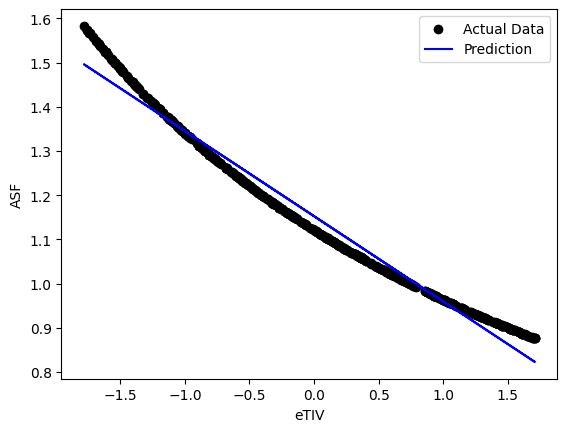

In [3]:
# Linear Regression Model
X = Balance_df[['eTIV']]

# X = Balance_df[['eTIV','CDR']] 
y = Balance_df['ASF']
# y = Balance_df['MMSE']

# Splitting into training set and testing seting using 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# standardizes feature data 
Scaler = StandardScaler()
X_Train_scaled  = Scaler.fit_transform(X_train)
X_Test_scaled = Scaler.transform(X_test)    

# Model training
Model = LinearRegression()
Model.fit(X_Train_scaled,Y_train)

y_pred = Model.predict(X_Test_scaled)
# caluclate model performance
MSE = mean_squared_error(Y_test,y_pred)
MAE = mean_absolute_error(Y_test,y_pred)
R2_score = r2_score(Y_test,y_pred)

print("Mean Squared Error",MSE)
print("Mean Absolute Error",MAE)
print("R2 Score",R2_score)

# Visualizing linear regression
plt.scatter (X_Test_scaled,Y_test,color='Black',label= 'Actual Data')
plt.plot(X_Test_scaled,y_pred, color='Blue', label='Prediction' )
plt.xlabel('eTIV')
plt.ylabel('ASF')
plt.legend()
plt.show()







Accuracy 0.7931937172774869
Classfication Report
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       184
           1       1.00      0.60      0.75       198

    accuracy                           0.79       382
   macro avg       0.85      0.80      0.79       382
weighted avg       0.86      0.79      0.79       382

ROC AUC Score 0.8005050505050505


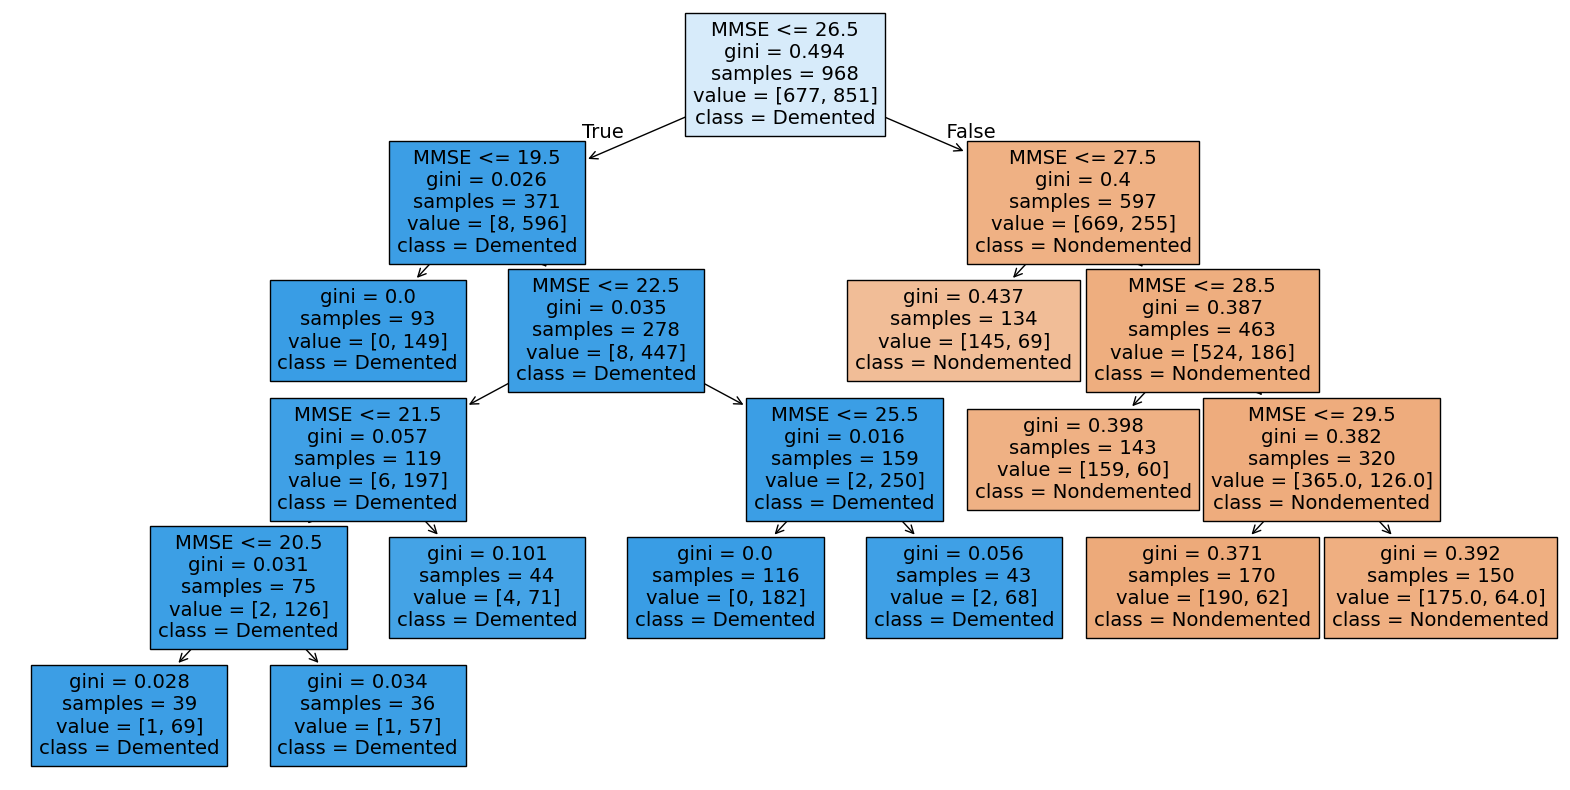

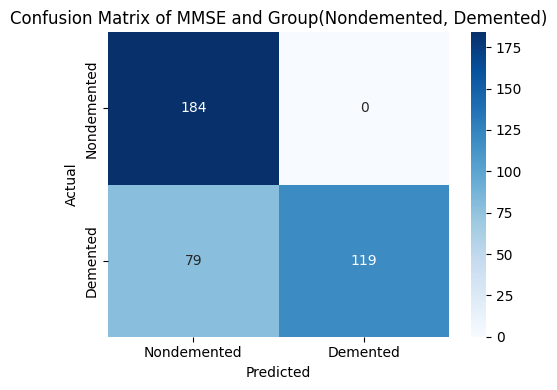

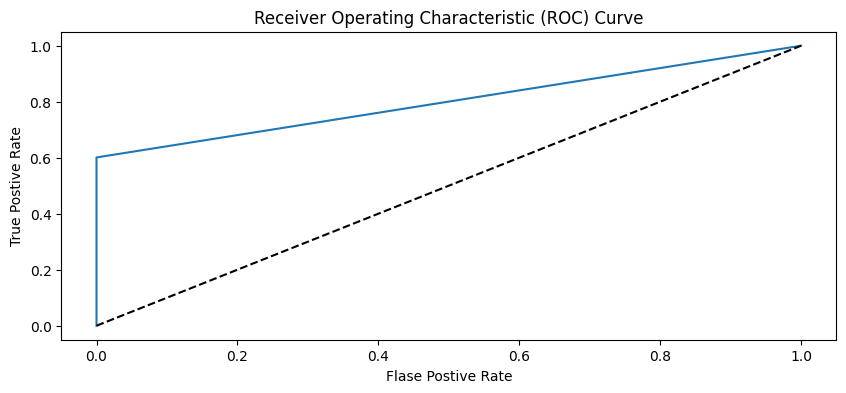

Accuracy 0.9397905759162304
Classfication Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       184
           1       1.00      0.88      0.94       198

    accuracy                           0.94       382
   macro avg       0.94      0.94      0.94       382
weighted avg       0.95      0.94      0.94       382

ROC AUC Score 0.9419191919191919


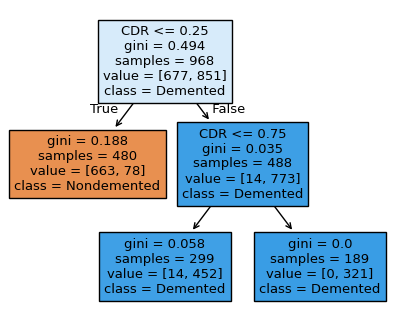

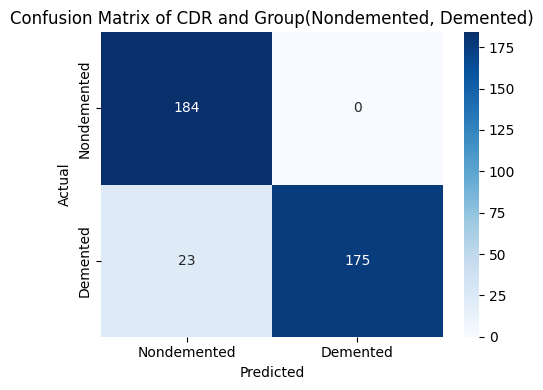

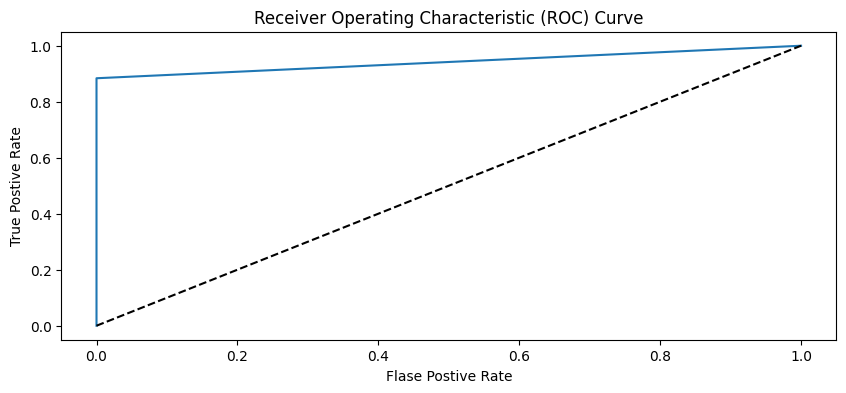

In [ ]:
# Random Forest Classifier Model
X = Balance_df[['MMSE']]

Y = Balance_df['GROUP']
# Splitting into training set and testing seting using 30/70

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model Training
Model = RandomForestClassifier(n_estimators=100,random_state=42,max_depth=20)
Model.fit(X_train,y_train)
y_pred = Model.predict(X_test)

# Accuracy Score and classification report 
RF_MMSE_AC = accuracy_score(y_test,y_pred)
Report = classification_report(y_test,y_pred)

print("Accuracy",RF_MMSE_AC)
print("Classfication Report")
print(Report)


plt.figure(figsize=(20,10))
plot_tree(Model.estimators_[0], feature_names=X.columns, class_names=['Nondemented', 'Demented'], filled=True)

# Plotting confusion matrix

plt.figure(figsize=(5,4))
CM  = confusion_matrix(y_test,y_pred)
sns.heatmap(CM, annot=True,fmt= 'd' , cmap='Blues',xticklabels=['Nondemented', 'Demented'],yticklabels=['Nondemented', 'Demented'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of MMSE and Group(Nondemented, Demented)')
plt.tight_layout()


# ROC AUC cure plotting 
plt.figure(figsize=(10,4))
RF_MMSE_ROC = roc_auc_score(y_test,y_pred)
print("ROC AUC Score",RF_MMSE_ROC)
fpr, tpr , thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label='ROC Curve')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# Random Forest Classifier with CDR


X = Balance_df[['CDR']]

Balance_df['GROUP'] = Balance_df['Group'].map({'Nondemented': 0,'Demented' : 1})
Y = Balance_df['GROUP']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Model = RandomForestClassifier(n_estimators=100,random_state=42,max_depth=20)
Model.fit(X_train,y_train)

y_pred = Model.predict(X_test)
RF_CDR_AC = accuracy_score(y_test,y_pred)
Report = classification_report(y_test,y_pred)

print("Accuracy",RF_CDR_AC)
print("Classfication Report")
print(Report)



plt.figure(figsize=(5,4))
plot_tree(Model.estimators_[0], feature_names=X.columns, class_names=['Nondemented', 'Demented'], filled=True)


plt.figure(figsize=(5,4))
CM  = confusion_matrix(y_test,y_pred)
sns.heatmap(CM, annot=True,fmt= 'd' , cmap='Blues',xticklabels=['Nondemented', 'Demented'],yticklabels=['Nondemented', 'Demented'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of CDR and Group(Nondemented, Demented)')
plt.tight_layout()


plt.figure(figsize=(10,4))
RF_CDR_ROC = roc_auc_score(y_test,y_pred)
print("ROC AUC Score",RF_CDR_ROC)
fpr, tpr , thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label='ROC Curve')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


Accuracy 0.9336823734729494
Classfication Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.94       277
           1       0.99      0.88      0.93       296

    accuracy                           0.93       573
   macro avg       0.94      0.94      0.93       573
weighted avg       0.94      0.93      0.93       573

ROC AUC Score 0.9368353010049761


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


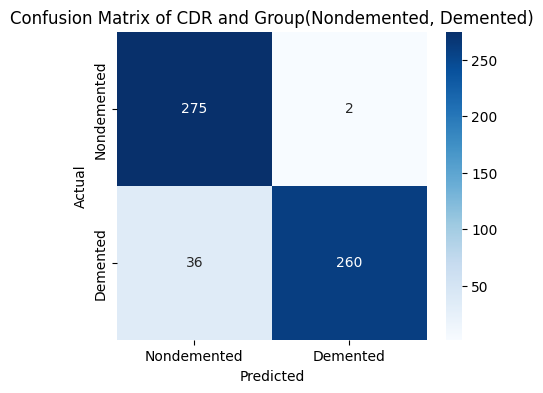

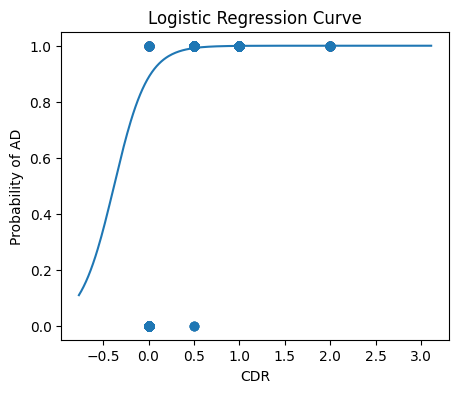

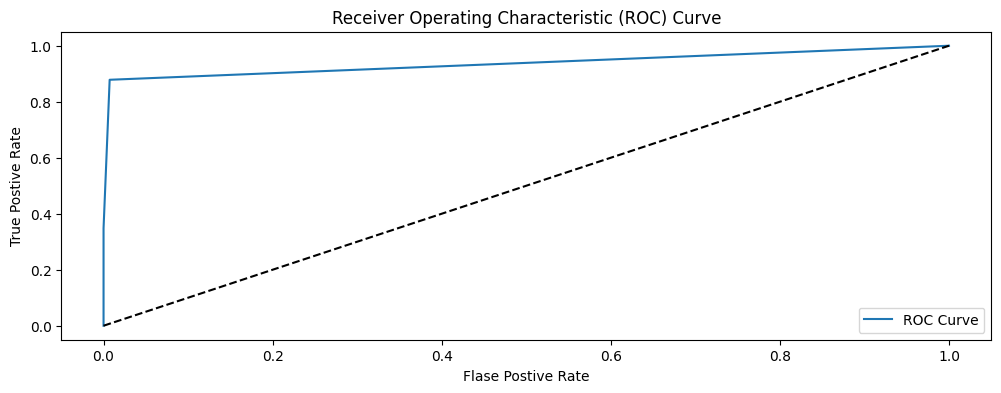

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Accuracy 0.7486910994764397
Classfication Report
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       277
           1       0.78      0.72      0.75       296

    accuracy                           0.75       573
   macro avg       0.75      0.75      0.75       573
weighted avg       0.75      0.75      0.75       573

ROC AUC Score 0.8253122255829837


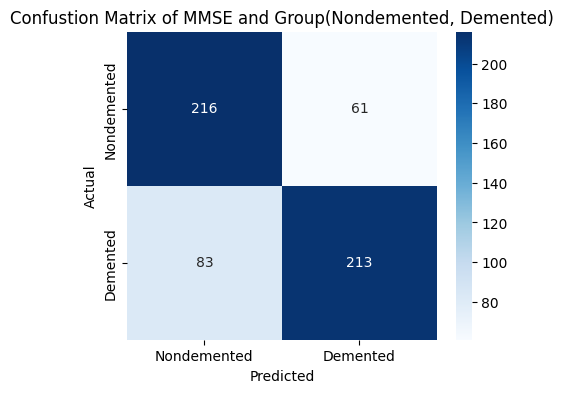

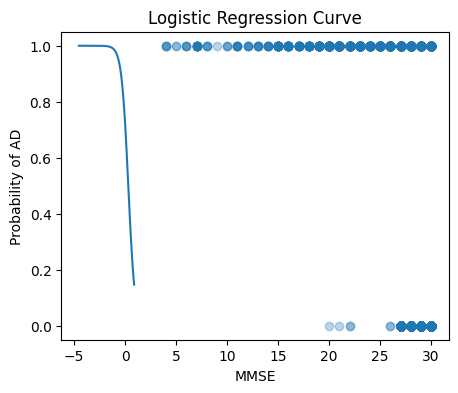

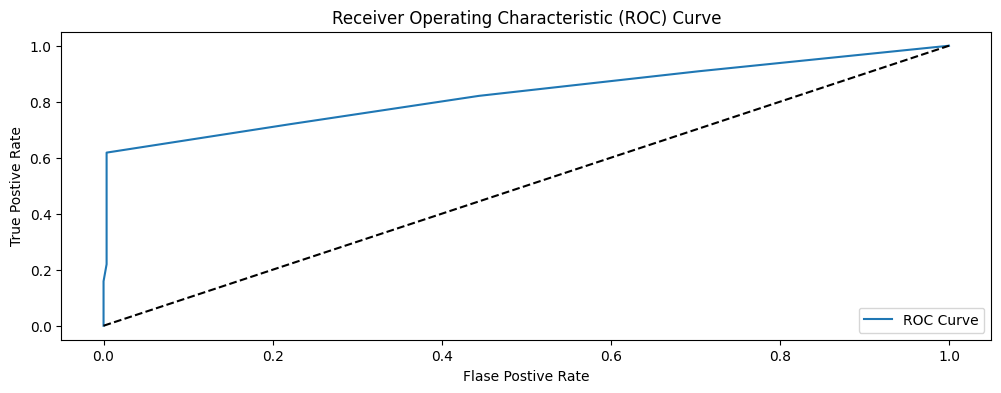

In [ ]:
# Logistic Regression Model 

X = Balance_df[['CDR']]
Y = Balance_df['GROUP']

# Splitting into training set and testing seting using 30/70

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Standardnizing feature
Scaler = StandardScaler()
X_Train_scaled  = Scaler.fit_transform(X_train)
X_Test_scaled = Scaler.transform(X_test)
# Model training
Model = LogisticRegression(penalty='l2')
Model.fit(X_Train_scaled,y_train)
Y_Pred = Model.predict(X_Test_scaled)


# Model performance calculation
Y_Pred_Proba = Model.predict_proba(X_Test_scaled)[:,1]
LR_CDR_AC = accuracy_score(y_test,Y_Pred)
print("Accuracy", LR_CDR_AC)
print("Classfication Report")
print(classification_report(y_test,Y_Pred))



LogisticRegression_CDR_ROC_Score  = roc_auc_score(y_test,Y_Pred_Proba)
print("ROC AUC Score",LogisticRegression_CDR_ROC_Score)

Confusion_Matrix = confusion_matrix(y_test,Y_Pred)
plt.figure(figsize=(5,4))
sns.heatmap(Confusion_Matrix, annot=True,fmt= 'd' , cmap='Blues',xticklabels=['Nondemented', 'Demented'],yticklabels=['Nondemented', 'Demented'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of CDR and Group(Nondemented, Demented)')

# plotting Logistic Regression curve
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1,1)
X_Scaled_Range = Scaler.transform(X_range)
Y_Prob = Model.predict_proba(X_Scaled_Range)[:,1]
plt.figure(figsize=(5,4))
plt.scatter(X, Y, alpha=0.3)
plt.plot(X_Scaled_Range, Y_Prob)
plt.xlabel('CDR')
plt.ylabel('Probability of AD')
plt.title('Logistic Regression Curve')
plt.show()

# Plotting ROC AUC curve
plt.figure(figsize=(12,4))

fpr, tpr , thresholds = roc_curve(y_test,Y_Pred_Proba)
plt.plot(fpr,tpr,label='ROC Curve')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Logistic Regression with MMSE feature 

X = Balance_df[['MMSE']]
Y = Balance_df['GROUP']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Scaler = StandardScaler()
X_Train_scaled  = Scaler.fit_transform(X_train)
X_Test_scaled = Scaler.transform(X_test)

Model = LogisticRegression(penalty='l2')
Model.fit(X_Train_scaled,y_train)

Y_Pred = Model.predict(X_Test_scaled)

Y_Pred_Proba = Model.predict_proba(X_Test_scaled)[:,1]
LR_MMSE_AC = accuracy_score(y_test,Y_Pred)
print("Accuracy",LR_MMSE_AC)
print("Classfication Report")
print(classification_report(y_test,Y_Pred))
LogisticRegression_MMSE_ROC_Score = roc_auc_score(y_test,Y_Pred_Proba)
print("ROC AUC Score",LogisticRegression_MMSE_ROC_Score)

Confusion_Matrix = confusion_matrix(y_test,Y_Pred)
plt.figure(figsize=(5,4))
sns.heatmap(Confusion_Matrix, annot=True,fmt= 'd' , cmap='Blues',xticklabels=['Nondemented', 'Demented'],yticklabels=['Nondemented', 'Demented'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion Matrix of MMSE and Group(Nondemented, Demented)')

X_range = np.linspace(X.min(), X.max(), 300).reshape(-1,1)
X_Scaled_Range = Scaler.transform(X_range)
Y_Prob = Model.predict_proba(X_Scaled_Range)[:,1]
plt.figure(figsize=(5,4))
plt.scatter(X, Y, alpha=0.3)
plt.plot(X_Scaled_Range, Y_Prob)
plt.xlabel('MMSE')
plt.ylabel('Probability of AD')
plt.title('Logistic Regression Curve')
plt.show()

plt.figure(figsize=(12,4))
fpr, tpr , thresholds = roc_curve(y_test,Y_Pred_Proba)
plt.plot(fpr,tpr,label='ROC Curve')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Accuracy 0.8010471204188482
Classfication Report
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       277
           1       0.99      0.62      0.76       296

    accuracy                           0.80       573
   macro avg       0.85      0.81      0.80       573
weighted avg       0.86      0.80      0.79       573

ROC curve Accuracy Score 0.8253122255829837


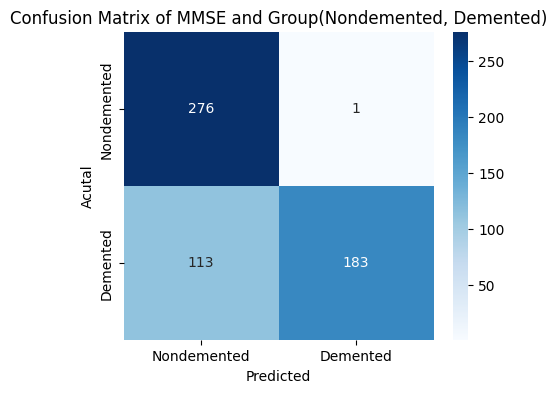

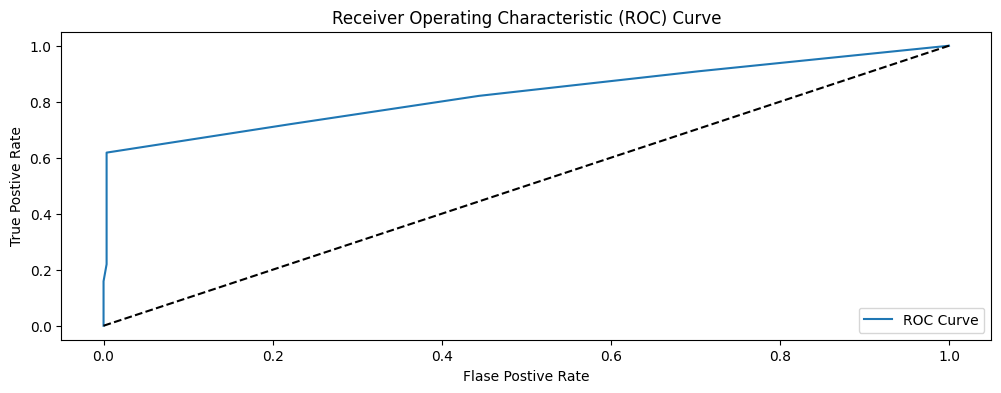

Accuracy 0.9336823734729494
Classfication Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.94       277
           1       0.99      0.88      0.93       296

    accuracy                           0.93       573
   macro avg       0.94      0.94      0.93       573
weighted avg       0.94      0.93      0.93       573

ROC curve Accuracy Score 0.9368353010049761


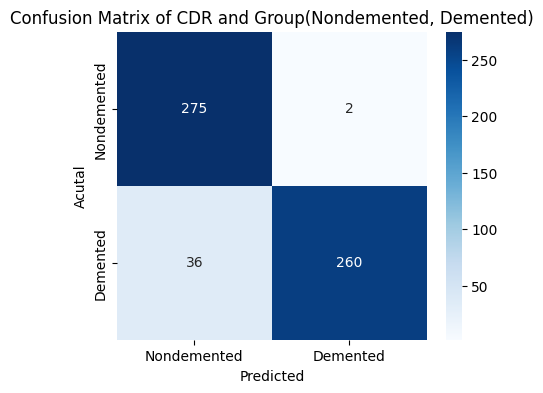

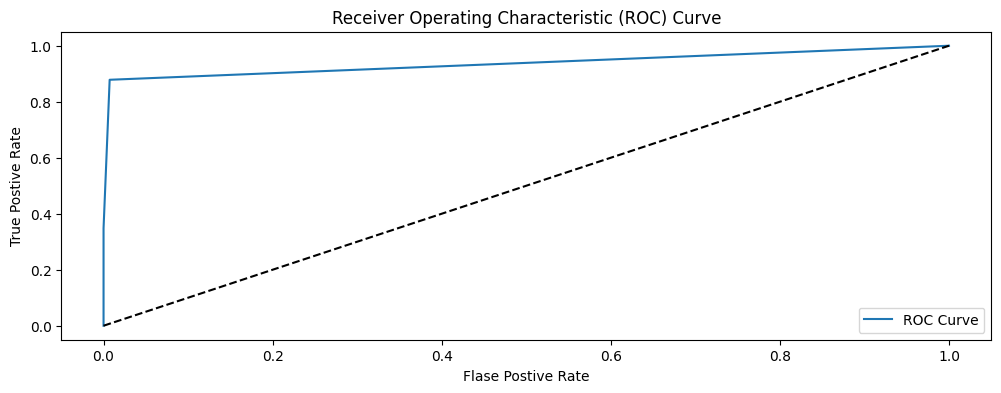

In [6]:

# Support Vector Machine model
# X = Balance_df[['CDR','MMSE','nWBV','ASF']]
# X = Balance_df[['CDR']]
X = Balance_df[['MMSE']]

Y = Balance_df['GROUP']
# Splitting into training set and testing seting using 30/70

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Standardized features
scaler = StandardScaler()
X_Train_Scaled = scaler.fit_transform(X_train)
X_Test_Scaled = scaler.transform(X_test)
# Model training
Model = SVC(kernel='linear',probability=True)
Model.fit(X_Train_Scaled, y_train)

Y_Predict = Model.predict(X_Test_Scaled)
# Calculating model performance
SVM_MMSE_AC = accuracy_score(y_test,Y_Predict)
Report = classification_report(y_test,Y_Predict)

print("Accuracy",SVM_MMSE_AC)
print("Classfication Report")
print(Report)
# plotting confusion matrix
Confusion_Matrix = confusion_matrix(y_test,Y_Predict)
plt.figure(figsize=(5,4))
sns.heatmap(Confusion_Matrix, annot=True,fmt='d', cmap='Blues', xticklabels=['Nondemented', 'Demented'],yticklabels=['Nondemented', 'Demented'])
plt.xlabel('Predicted')
plt.ylabel('Acutal')
plt.title('Confusion Matrix of MMSE and Group(Nondemented, Demented)')
# ROC AUC cure plotting 
plt.figure(figsize=(12,4))
Y_Pred_Proba = Model.predict_proba(X_Test_Scaled)[:,1]
SVM_MMSE_ROC_Score = roc_auc_score(y_test,Y_Pred_Proba)
print("ROC curve Accuracy Score",SVM_MMSE_ROC_Score)
fpr, tpr , thresholds = roc_curve(y_test,Y_Pred_Proba)
plt.plot(fpr,tpr,label='ROC Curve')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# SVM model with CDR 
X = Balance_df[['CDR']]

Balance_df['GROUP'] = Balance_df['Group'].map({'Nondemented': 0,'Demented' : 1})
Y = Balance_df['GROUP']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_Train_Scaled = scaler.fit_transform(X_train)
X_Test_Scaled = scaler.transform(X_test)

Model = SVC(kernel='linear',probability=True)
Model.fit(X_Train_Scaled, y_train)

Y_Predict = Model.predict(X_Test_Scaled)

SVM_CDR_AC = accuracy_score(y_test,Y_Predict)
Report = classification_report(y_test,Y_Predict)

print("Accuracy",SVM_CDR_AC)
print("Classfication Report")
print(Report)

Confusion_Matrix = confusion_matrix(y_test,Y_Predict)
plt.figure(figsize=(5,4))
sns.heatmap(Confusion_Matrix, annot=True,fmt='d', cmap='Blues', xticklabels=['Nondemented', 'Demented'],yticklabels=['Nondemented', 'Demented'])
plt.xlabel('Predicted')
plt.ylabel('Acutal')
plt.title('Confusion Matrix of CDR and Group(Nondemented, Demented)')

plt.figure(figsize=(12,4))
Y_Pred_Proba = Model.predict_proba(X_Test_Scaled)[:,1]
SVM_CDR_ROC_Score = roc_auc_score(y_test,Y_Pred_Proba)
print("ROC curve Accuracy Score",SVM_CDR_ROC_Score)
fpr, tpr , thresholds = roc_curve(y_test,Y_Pred_Proba)
plt.plot(fpr,tpr,label='ROC Curve')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



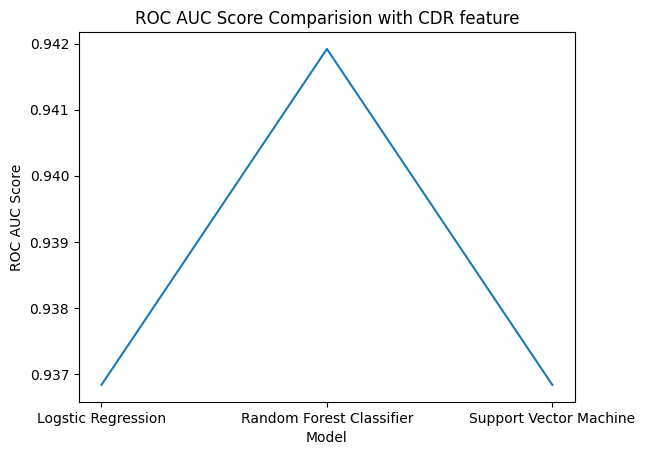

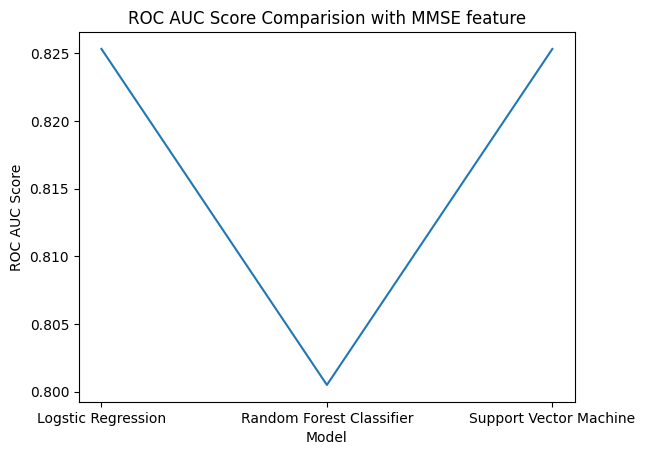

In [7]:
ML_Model = ['Logstic Regression','Random Forest Classifier','Support Vector Machine'] #Machine learning model list
CDR_Accuracy = [LogisticRegression_CDR_ROC_Score,RF_CDR_ROC,SVM_CDR_ROC_Score] # Model accuracy with CDR feature list

plt.figure()
plt.plot(ML_Model,CDR_Accuracy)     
plt.xlabel('Model')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score Comparision with CDR feature')
plt.show()

MMSE_Accuracy = [LogisticRegression_MMSE_ROC_Score,RF_MMSE_ROC,SVM_MMSE_ROC_Score] #Model accuracy with MMSE feature list
plt.figure()
plt.plot(ML_Model,MMSE_Accuracy)     
plt.xlabel('Model')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score Comparision with MMSE feature')
plt.show()

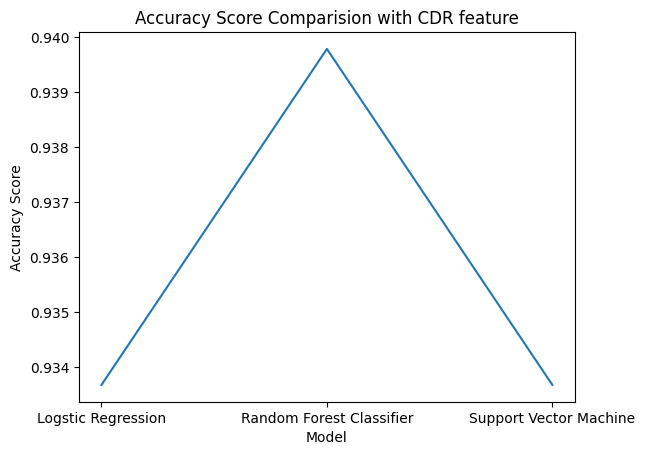

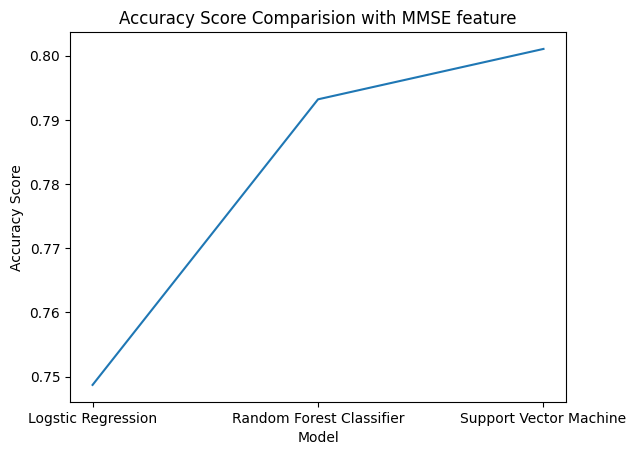

In [8]:
ML_Model = ['Logstic Regression','Random Forest Classifier','Support Vector Machine'] #Machine learning model list
CDR_Accuracy = [LR_CDR_AC,RF_CDR_AC,SVM_CDR_AC] # Model ROC AUC score with CDR feature list

plt.figure()
plt.plot(ML_Model,CDR_Accuracy)     
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparision with CDR feature')
plt.show()

MMSE_Accuracy = [LR_MMSE_AC,RF_MMSE_AC,SVM_MMSE_AC] #Model ROC AUC score with MMSE feature list


plt.figure()
plt.plot(ML_Model,MMSE_Accuracy)     
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparision with MMSE feature')
plt.show()

Accuracy 0.9336823734729494
Classfication Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.94       277
           1       0.99      0.88      0.93       296

    accuracy                           0.93       573
   macro avg       0.94      0.94      0.93       573
weighted avg       0.94      0.93      0.93       573



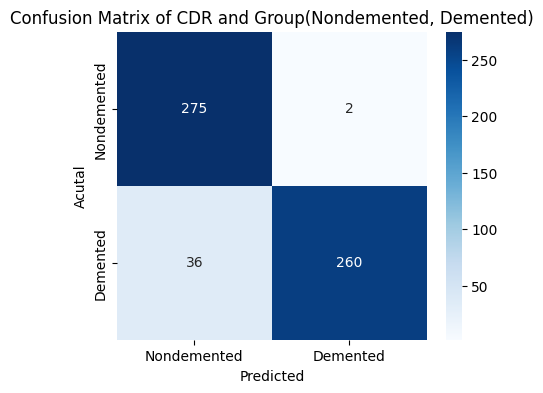

In [9]:
# Support vector machine with 4 features
X = Balance_df[['ASF', 'MMSE', 'CDR', 'eTIV']]

Balance_df['GROUP'] = Balance_df['Group'].map({'Nondemented': 0,'Demented' : 1})
Y = Balance_df['GROUP']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_Train_Scaled = scaler.fit_transform(X_train)
X_Test_Scaled = scaler.transform(X_test)

Model = SVC(kernel='linear',probability=True)
Model.fit(X_Train_Scaled, y_train)

Y_Predict = Model.predict(X_Test_Scaled)

SVM_CDR_AC = accuracy_score(y_test,Y_Predict)
Report = classification_report(y_test,Y_Predict)

print("Accuracy",SVM_CDR_AC)
print("Classfication Report")
print(Report)

Confusion_Matrix = confusion_matrix(y_test,Y_Predict)
plt.figure(figsize=(5,4))
sns.heatmap(Confusion_Matrix, annot=True,fmt='d', cmap='Blues', xticklabels=['Nondemented', 'Demented'],yticklabels=['Nondemented', 'Demented'])
plt.xlabel('Predicted')
plt.ylabel('Acutal')
plt.title('Confusion Matrix of CDR and Group(Nondemented, Demented)')
plt.show()

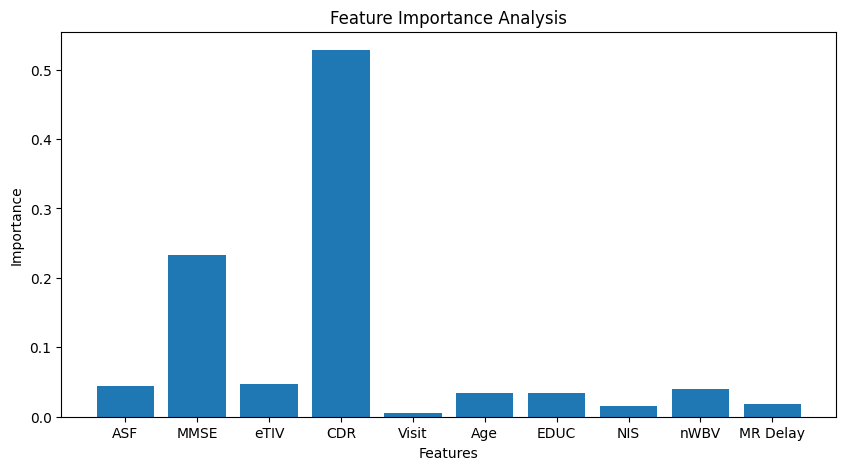

In [ ]:
# Feature Importance analysis 
X = Balance_df[['ASF','MMSE','eTIV','CDR','Visit','Age','EDUC','NIS','nWBV','MR Delay']]
Y = Balance_df['GROUP']

model = RandomForestClassifier(random_state=42)
model.fit(X,Y)

# it give score for each feature depending on how well it can predict
importance = model.feature_importances_
if importance is not None:
    importance_DF = pd.DataFrame({'Features':X.columns,'Importance':model.feature_importances_})
importance_DF

plt.figure(figsize=(10,5))
plt.bar(importance_DF['Features'], importance_DF['Importance'])
plt.title('Feature Importance Analysis')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()